<a href="https://colab.research.google.com/github/JACKARPANJACK/AI-Lab-6th-sem/blob/main/UCS_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt



def draw_graph_with_path(graph, path):
    G = nx.DiGraph()

    # Add edges
    for u in graph:
        for v, w in graph[u]:
            G.add_edge(u, v, weight=w)

    # UI nodes Position
    pos = {
        'S': (0, 2),
        'A': (-1, 1),
        'B': (1, 1),
        'C': (-2, 0),
        'D': (0, 0),
        'G': (1, -1),
        'E': (-2, -1),
        'F': (-1, -1)
    }

    # Draw base graph
    plt.figure(figsize=(10, 6))
    nx.draw(
        G, pos,
        with_labels=True,
        node_size=900,
        node_color="lightblue",
        font_size=12,
        arrows=True
    )

    # Draw edge weights
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=nx.get_edge_attributes(G, 'weight')
    )

    # Highlight UCS path
    if path:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(
            G, pos,
            edgelist=path_edges,
            edge_color="red",
            width=3,
            arrows=True
        )
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=path,
            node_color="red",
            node_size=1000
        )

    plt.title("Uniform Cost Search – Optimal Path Highlighted")
    plt.show()


def uniform_cost_search(graph, start, goal):
    pq = [(0, start)]                # (cost, node)
    cost = {start: 0}
    parent = {start: None}

    while pq:
        current_cost, u = heapq.heappop(pq)

        if current_cost > cost[u]:
            continue

        if u == goal:
            return reconstruct_path(parent, goal), current_cost

        for v, edge_cost in graph.get(u, []):
            new_cost = current_cost + edge_cost

            if v not in cost or new_cost < cost[v]:
                cost[v] = new_cost
                parent[v] = u
                heapq.heappush(pq, (new_cost, v))

    return None, float('inf')


def reconstruct_path(parent, goal):
    path = []
    while goal:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]


In [1]:
def bfs(graph, start, goal):
    queue = deque([start])
    visited = {start: None}

    while queue:
        current = queue.popleft()

        if current == goal:
            return reconstruct_path_single(current, visited)

        for neighbor in graph.get(current, []):
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)

    return None

In [ ]:
graph = {
    'S': [('A', 1), ('B', 4)],
    'A': [('C', 3), ('D', 2)],
    'B': [('G', 5)],
    'C': [('E', 5)],
    'E': [('G', 5)],
    'D': [('F', 0), ('G', 3)],
    'F': [],
    'G': []
}

start = 'S'
goal = 'G'


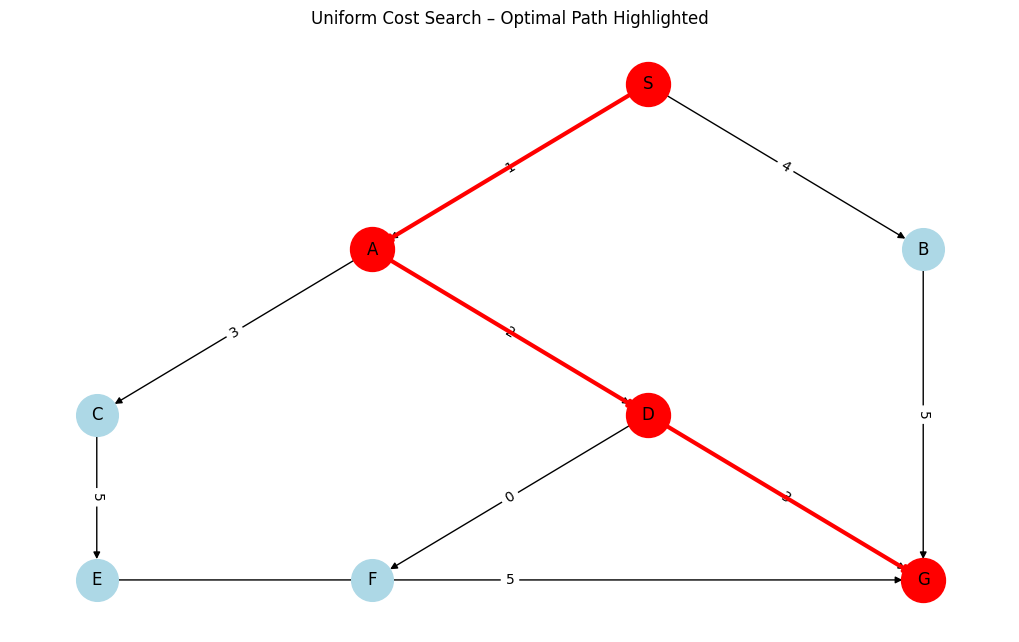

Path: ['S', 'A', 'D', 'G']
Total Cost: 6


In [ ]:
path, cost = uniform_cost_search(graph, start, goal)

draw_graph_with_path(graph, path)
print("Path:", path)
print("Total Cost:", cost)
